# Finding The Best Markets To Advertise In

### We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

### In the ideal scenario to reach our goal we would organize surveys for a couple of different markets to find out which would the best choices for advertising. This takes time and is costly, however, it's usually a good idea to explore cheaper options first. We can try to search for existing data that might be relevant for our purpose. One candidate is the data from freeCodeCamp's 2017 New Coder Survey. FreeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [1]:
#Imports and Versions for reproducibility
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('Pandas Version:', pd.__version__)
print('NumPy Version:', np.__version__)
print('JSON Version:', json.__version__)
print('Matplotlib Version:', matplotlib.__version__)
print('Seaborn Version:', sns.__version__)

Pandas Version: 0.25.3
NumPy Version: 1.18.1
JSON Version: 2.0.9
Matplotlib Version: 3.1.2
Seaborn Version: 0.10.0


In [2]:
#Read our Dataset into a DataFrame
fcc_data = pd.read_csv('Datasets/2017-fCC-New-Coders-Survey-Data.csv')

/home/jared/python3dev1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Display the number of rows and columns
fcc_data.shape

(18175, 136)

In [4]:
fcc_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
#Lets take a look at the some of the data:
fcc_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We also have a data dictionary in the datapackage.json file that describes what each column is...
It Contains:
* the name of the field,
* a short description of what it is,
* the question which was asked,
* and what the type of the data field is...


In [6]:
#After going through the data I believe it is a good idea to go through the jobroleinterest column to get an idea of the distributions of our data
#This column Describes roles every participant will be interested in...
frequency_table = fcc_data['JobRoleInterest'].value_counts(normalize = True) * 100
len(frequency_table)

3213

In [7]:
frequency_table.head(20)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

There are 3213 values for the frequency table we created which makes me think there are lots of people interested in many different roles, which we can see when we looked at the first 20 values for JobRoleInterest.

In [8]:
#Cleaning up some of the job role interest data
jobroleinterest_no_nulls = fcc_data['JobRoleInterest'].dropna()
split_interests = jobroleinterest_no_nulls.str.split(',')

num_options = split_interests.apply(lambda x: len(x))
num_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only around 32% of the participants that answered this question actually know what specific programming niche they would like to work on. This means 68% of participants that responded to jobroleinterest are interested in 2 or more roles... This could be really good for us because we can take a look at those interested in what we primarily focus on which is web and mobile development.

In [9]:
web_or_mobile = jobroleinterest_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table_web_mobile = web_or_mobile.value_counts(normalize=True) * 100
freq_table_web_mobile

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

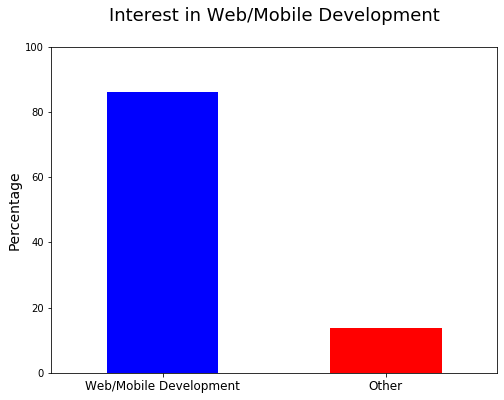

In [10]:
plt.figure(figsize=(8,6))
freq_table_web_mobile.plot.bar(color=('blue', 'red'))
plt.title('Interest in Web/Mobile Development', fontsize=18, y=1.06)
plt.xticks([0,1],['Web/Mobile Development', 'Other'], rotation=0, fontsize=12)
plt.ylabel('Percentage', fontsize=14)
plt.ylim([0, 100])
plt.show()

In [11]:
#I am also curious to see those those who are interested in Data Science
data_sci_interest = jobroleinterest_no_nulls.str.contains('Data Scientist')
freq_table_ds = data_sci_interest.value_counts(normalize=True) * 100
freq_table_ds

False    76.501716
True     23.498284
Name: JobRoleInterest, dtype: float64

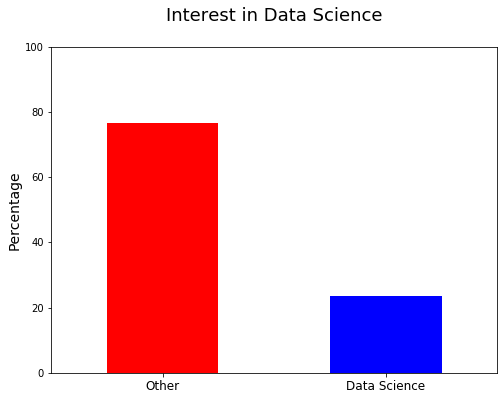

In [12]:
plt.figure(figsize=(8,6))
freq_table_ds.plot.bar(color = ('red', 'blue'))
plt.title('Interest in Data Science', fontsize=18, y=1.06)
plt.xticks([0, 1],['Other', 'Data Science'], rotation=0, fontsize=12)
plt.ylabel('Percentage', fontsize=14)
plt.ylim([0, 100])
plt.show()

As you can see the interest in Data Science is much much smaller than that of our primary focus of web/mobile development.

In [13]:
country_live = fcc_data[fcc_data['JobRoleInterest'].notnull()].copy()
country_live_freq_counts = country_live['CountryLive'].value_counts()
country_live_freq_perc = country_live['CountryLive'].value_counts(normalize=True) * 100

pd.DataFrame(data={'Counts': country_live_freq_counts, 'Percent': country_live_freq_perc})

,Counts,Percent
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Botswana,1,0.014624
Gambia,1,0.014624
Aruba,1,0.014624
Mozambique,1,0.014624


Approximately 46% of our potential customers are located in the U.S. which makes it seem as though this is the most interesting market followed up by India the United Kingdom and Canada. We also must take a look at how much money these potential users are actually willing to spend on learning these skills because if we advertise to people who are looking only for free resources or who can't afford our services than what good is it? This would lead to us losing money...

In [14]:
#We have the idea of selling our subscription model for $49 per month so we will take a look at the MoneyForLearning column to see the amount of dollars spent
#We will be utilizing the first 4 countries in our dataset... Which are all primarily English speaking countries
country_live['MonthsProgramming'].replace(0,1, inplace=True) # this line will prevent us from dividing by 0

country_live['money_per_month'] = country_live['MoneyForLearning'] / country_live['MonthsProgramming']
country_live['money_per_month'].isnull().sum()

675

In [15]:
money_per_month = country_live[country_live['money_per_month'].notnull()]

country_live_data_for_money = money_per_month[money_per_month['CountryLive'].notnull()]
country_live_data_for_money['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [16]:
country_live_mean = country_live_data_for_money.groupby('CountryLive').mean()
country_live_mean.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
CountryLive,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.750000,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
Albania,20.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,7.111111
Algeria,23.750000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.000000
Angola,20.000000,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,116.666667
Anguilla,25.000000,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [17]:
country_live_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Based on some basic economics you would expect that the UK and Canada spending would be more or at least equal to that of india which makes me think there are some outliers in this dataset...

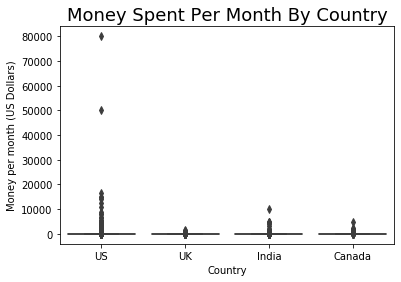

In [18]:
main_4 = country_live_data_for_money[country_live_data_for_money['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

#We can use a boxplot to see the distribution of the data here:
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = main_4)
plt.title('Money Spent Per Month By Country', fontsize = 18)
plt.ylabel('Money per month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [19]:
country_live_data_for_money = country_live_data_for_money[country_live_data_for_money['money_per_month'] < 2500]
countries_mean  = country_live_data_for_money.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    97.893738
India                       65.758763
United Kingdom              45.534443
Canada                      93.065400
Name: money_per_month, dtype: float64

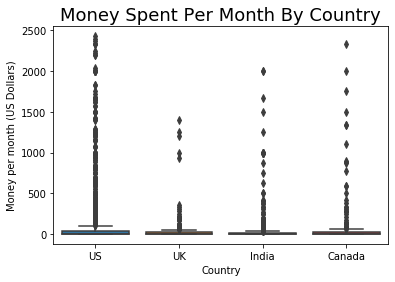

In [20]:
main_4 = country_live_data_for_money[country_live_data_for_money['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

#boxplot to see the distribution of the data again:
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = main_4)
plt.title('Money Spent Per Month By Country', fontsize = 18)
plt.ylabel('Money per month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We removed most of the outliers and now we can see that the 2 best markets for us to advertise in are the US and Canada followed by India and then the UK. However lets say our product is a monthly subscription of around 49 dollars then in this case it may not be worth it to invest in advertising for the UK because the cost is more than the average they are willing to pay per month. However Canada only has approx 260 potential customers for this survey where India has 528 potential customers so it may actually be better to advertise in India...

Now there are many different options for us:
* Advertise in the US only 100% ad spend (may miss out on a lot of potential customers)
* Advertise with a large portion of budget for US then a smaller portion for India and an even smaller portion for canada (65% / 20% / 15%) or vice versa
* We can also try combinations of 2 of the markets (Such as US and Canada or US and India)

This is where I would set up a few different split tests in order to come up with an optimal solution or to improve our current solution...

So clearly it is ideal to invest in advertising in the US market however it is unclear whether or not we may see a more substantial gain by investing in one of the 2 next best markets either Canada or India.